In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as gr
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from sympy import *

In [2]:
def abcd_constants(x_plot,T,t_i, iter_layer, prev_layer, K, N):
    h = x_plot[1] - x_plot[0]
    u0 = 1
    x_len=len(x_plot)

    a_plot = []
    b_plot = []
    c_plot = []
    d_plot = []

    C= T / (2 * h ** 2)

    a0 = 0
    b0 = 1
    c0 = 0
    d0 = u0 * t_i ** K

    a_plot.append(a0)
    b_plot.append(b0)
    c_plot.append(c0)
    d_plot.append(d0)

    am = 0
    bm = 1
    cm = 0
    dm = 0
    for k in range(1, x_len - 1):
        ak = (-1) * C * (iter_layer[k] ** N + iter_layer[k - 1] ** N)
        bk = 1 + C * (iter_layer[k + 1] ** N + 2 * iter_layer[k] ** N + iter_layer[k - 1] ** N)
        ck = (-1) * C * (iter_layer[k + 1] ** N + iter_layer[k] ** N)
        fk = prev_layer[k]

        a_plot.append(ak)
        b_plot.append(bk)
        c_plot.append(ck)
        d_plot.append(fk)

    a_plot.append(am)
    b_plot.append(bm)
    c_plot.append(cm)
    d_plot.append(dm)

    return a_plot, b_plot, c_plot, d_plot

In [3]:
def Thomas_algorithm(a_plot, b_plot, c_plot, d_plot):
    n = len(d_plot)
    y_plot = []

    A_plot = []
    B_plot = []

    A0 = (-1) * c_plot[0] / b_plot[0]
    B0 = d_plot[0] / b_plot[0]

    A_plot.append(A0)
    B_plot.append(B0)

    for i in range(1, n - 1):
        Ai = (-1) * c_plot[i] / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        A_plot.append(Ai)

    for i in range(1, n):
        Bi = (d_plot[i] - a_plot[i] * B_plot[i - 1]) / (b_plot[i] + a_plot[i] * A_plot[i - 1])
        B_plot.append(Bi)

    An = 0
    A_plot.append(An)

    y_plot.append(B_plot[n - 1])

    for i in range(n - 2, -1, -1):
        yi = B_plot[i] + A_plot[i] * y_plot[0]
        y_plot.insert(0, yi)

    return y_plot

In [4]:
def solution(x_plot, t_plot, K, N):
    u_plot = []
    T = t_plot[1] - t_plot[0]

    layer_0 = np.zeros(len(x_plot))
    u_plot.append(layer_0)

    layer_i_s = layer_0
    prev_layer = layer_0

    for t_i in t_plot[1:]:
        for s in range(0, 4):
            a_plot, b_plot, c_plot, d_plot = abcd_constants(x_plot, T, t_i, layer_i_s, prev_layer, K, N)

            layer_i_s = Thomas_algorithm(a_plot, b_plot, c_plot, d_plot)

        u_plot.append(layer_i_s)
        prev_layer = layer_i_s

    return u_plot

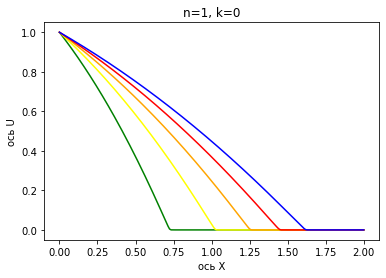

In [5]:
K = 0
N = 1
t_end = 1
temp = 0.2
x_plot = np.linspace(0, 2, 200)
ress=[]
while temp <= t_end:
    t_plot = np.linspace(0, temp, 200)
    result = solution(x_plot,t_plot, K, N)[-1]
    ress.append(result)
    temp = temp+0.2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_plot, ress[0], color="green")
ax.plot(x_plot,ress[1],color="yellow")
ax.plot(x_plot,ress[2],color="orange")
ax.plot(x_plot,ress[3],color="red")
ax.plot(x_plot,ress[4],color="blue")
ax.set_title('n=1, k=0')
ax.set_xlabel('ось X')
ax.set_ylabel('ось U')

plt.show()

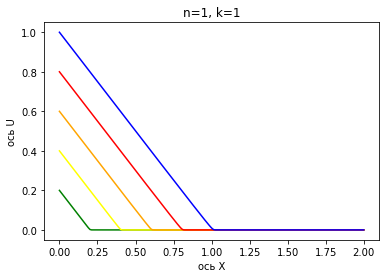

In [6]:
K = 1
N = 1
t_end = 1
temp = 0.2
x_plot = np.linspace(0, 2, 200)
ress=[]
while temp <= t_end:
    t_plot = np.linspace(0, temp, 200)
    result = solution(x_plot,t_plot, K, N)[-1]
    ress.append(result)
    temp = temp+0.2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_plot, ress[0], color="green")
ax.plot(x_plot,ress[1],color="yellow")
ax.plot(x_plot,ress[2],color="orange")
ax.plot(x_plot,ress[3],color="red")
ax.plot(x_plot,ress[4],color="blue")
ax.set_title('n=1, k=1')
ax.set_xlabel('ось X')
ax.set_ylabel('ось U')

plt.show()

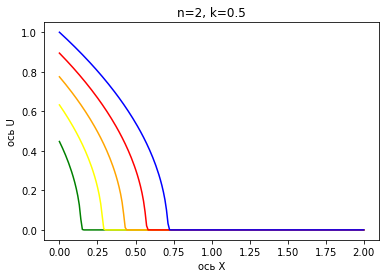

In [7]:
K = 0.5
N = 2
t_end = 1
temp = 0.2
x_plot = np.linspace(0, 2, 200)
ress=[]
while temp <= t_end:
    t_plot = np.linspace(0, temp, 200)
    result = solution(x_plot,t_plot, K, N)[-1]
    ress.append(result)
    temp = temp+0.2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_plot, ress[0], color="green")
ax.plot(x_plot,ress[1],color="yellow")
ax.plot(x_plot,ress[2],color="orange")
ax.plot(x_plot,ress[3],color="red")
ax.plot(x_plot,ress[4],color="blue")
ax.set_title('n=2, k=0.5')
ax.set_xlabel('ось X')
ax.set_ylabel('ось U')

plt.show()

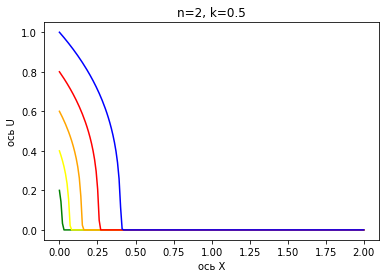

In [8]:
K = 1
N = 3
t_end = 1
temp = 0.2
x_plot = np.linspace(0, 2, 200)
ress=[]
while temp <= t_end:
    t_plot = np.linspace(0, temp, 200)
    result = solution(x_plot,t_plot, K, N)[-1]
    ress.append(result)
    temp = temp+0.2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_plot, ress[0], color="green")
ax.plot(x_plot,ress[1],color="yellow")
ax.plot(x_plot,ress[2],color="orange")
ax.plot(x_plot,ress[3],color="red")
ax.plot(x_plot,ress[4],color="blue")
ax.set_title('n=2, k=0.5')
ax.set_xlabel('ось X')
ax.set_ylabel('ось U')

plt.show()

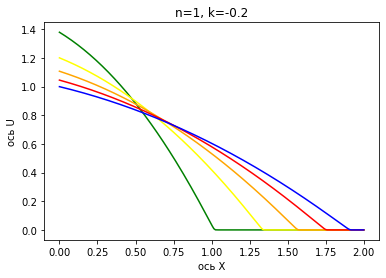

In [9]:
K = -0.2
N = 1
t_end = 1
temp = 0.2
x_plot = np.linspace(0, 2, 200)
ress=[]
while temp <= t_end:
    t_plot = np.linspace(0, temp, 200)
    result = solution(x_plot,t_plot, K, N)[-1]
    ress.append(result)
    temp = temp+0.2

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_plot, ress[0], color="green")
ax.plot(x_plot,ress[1],color="yellow")
ax.plot(x_plot,ress[2],color="orange")
ax.plot(x_plot,ress[3],color="red")
ax.plot(x_plot,ress[4],color="blue")
ax.set_title('n=1, k=-0.2')
ax.set_xlabel('ось X')
ax.set_ylabel('ось U')

plt.show()